In [65]:
from aerobot.dataset import dataset_load_all
from aerobot.plot import *
# from aerobot.utils import print_taxonomy_info
from aerobot.io import FEATURE_SUBTYPES, FEATURE_TYPES, load_results_dict
import numpy as np 
import os
import pandas as pd 
import subprocess

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classifiers

Code for evaluating the performance of `Nonlinear` and `LogisticRegression`-based ternary classifiers on various feature sets. Results dictionaries were generated by running the `hpc.py` script on the HPC, and are stored in the `results` directory.

In [41]:
RESULTS_PATH = '/home/prichter/Documents/aerobot/results/'
feature_types = ['KO', 'embedding.geneset.oxygen', 'chemical', 'aa_1mer', 'aa_3mer']  # Minimal list of feature types.

In [50]:
# Load in the results of each training run. 
nonlinear_results = dict() # Results of Nonlinear classifier. 
logistic_results = dict() # Results of LogisticRegression-based classifier. 

for feature_type in feature_types:
    filename = f'run_results_nonlinear_{feature_type}.json'
    nonlinear_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, filename))
    filename = f'run_results_logistic_{feature_type}.json'
    logistic_results[feature_type] = load_results_dict(os.path.join(RESULTS_PATH, filename))

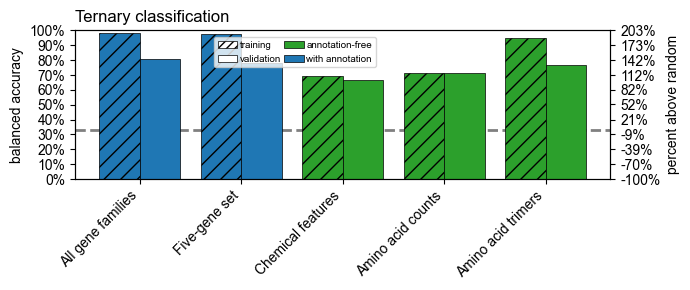

In [60]:
plot_model_accuracy_barplot(nonlinear_results)

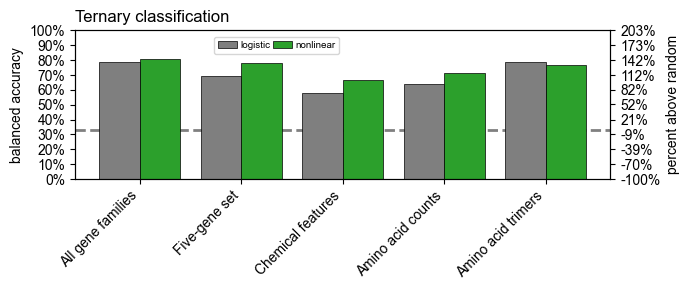

In [61]:
plot_model_comparison_barplot(nonlinear_results, logistic_results)

In [63]:
nonlinear_results['KO'].keys()

dict_keys(['training_acc', 'validation_acc', 'classes', 'confusion_matrix', 'f1_score', 'training_losses', 'validation_losses', 'training_accs', 'validation_accs', 'weight_decay', 'n_epochs', 'hidden_dim', 'alpha', 'lr', 'batch_size', 'early_stopping', 'n_classes', 'input_dim', 'feature_type', 'model_class', 'binary'])

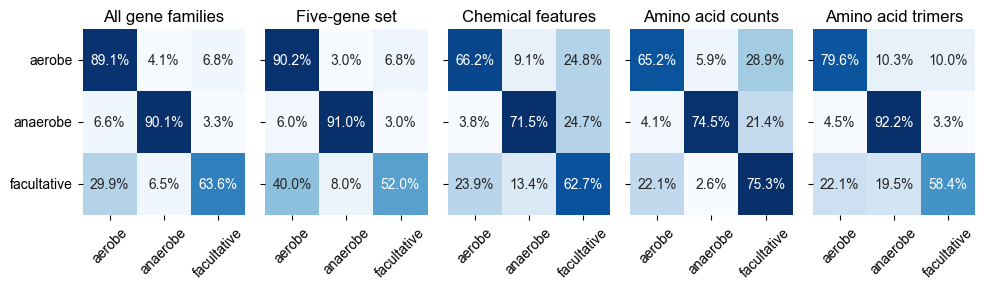

In [82]:
plot_confusion_matrices(nonlinear_results)